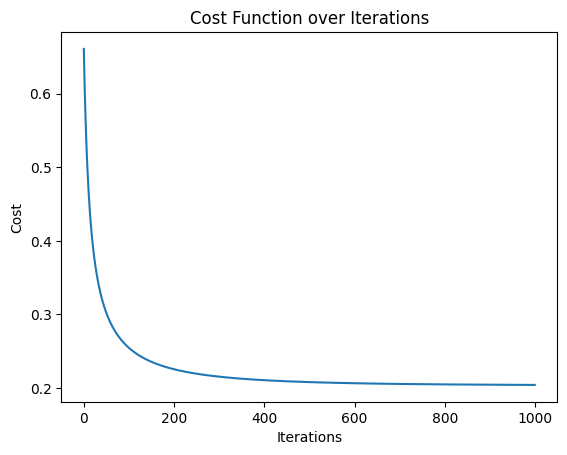

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return J

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - learning_rate * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Initialize theta and run gradient descent
theta = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Plot the cost function over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


Iteration: 0  Cost: 0.6929175361033992
Iteration: 1000  Cost: 0.2797664906064699
Iteration: 2000  Cost: 0.23864088110428347
Iteration: 3000  Cost: 0.22168226853794595
Iteration: 4000  Cost: 0.21562991772907317
Iteration: 5000  Cost: 0.21381377129169257
Iteration: 6000  Cost: 0.21054758881176275
Iteration: 7000  Cost: 0.20801324496409807
Iteration: 8000  Cost: 0.20767559235930366
Iteration: 9000  Cost: 0.20621176794739063


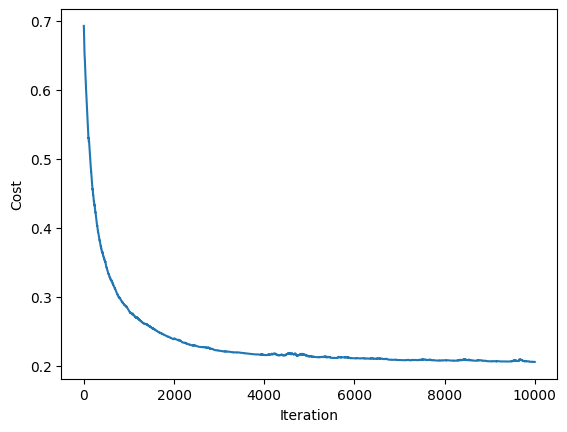

In [18]:
import numpy as np
from sklearn.datasets import make_classification

# Generate binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=1, random_state=42)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(X, y, theta):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    J = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return J

# Define gradient function
def compute_gradient(X, y, theta):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h - y)
    return grad

# Implement stochastic gradient descent
def sgd(X, y, alpha=0.01, num_iters=1000, batch_size=1):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for i in range(num_iters):
        batch_indices = np.random.randint(0, m, batch_size)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        gradient = compute_gradient(X_batch, y_batch, theta)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        if i % (num_iters/10) == 0:
            print("Iteration:", i, " Cost:", cost)
    return theta, cost_history

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Run SGD
theta, cost_history = sgd(X, y, alpha=0.01, num_iters=10000, batch_size=1)

# Plot cost over iterations
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
